In [22]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data for 10 goals
data = {
    'start_action': ['Own Half', 'Corner Kick', 'Free Kick', 'Throw In', 'Offensive Ball Gain', 'Own Half', 'Corner Kick', 'Throw In', 'Free Kick', 'Offensive Ball Gain'],
    'xG': [0.05, 0.20, 0.15, 0.10, 0.30, 0.25, 0.12, 0.35, 0.50, 0.07],
    'num_passes': [5, 3, 1, 2, 7, 4, 3, 2, 6, 5]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Let's display the dataset
print(df)


          start_action    xG  num_passes
0             Own Half  0.05           5
1          Corner Kick  0.20           3
2            Free Kick  0.15           1
3             Throw In  0.10           2
4  Offensive Ball Gain  0.30           7
5             Own Half  0.25           4
6          Corner Kick  0.12           3
7             Throw In  0.35           2
8            Free Kick  0.50           6
9  Offensive Ball Gain  0.07           5


In [23]:
# OneHotEncode the 'start_action' feature
encoder = OneHotEncoder(sparse=False)
encoded_start_action = encoder.fit_transform(df[['start_action']])

# Convert the encoded start_action back into a DataFrame and merge with the original data
encoded_df = pd.DataFrame(encoded_start_action, columns=encoder.get_feature_names_out(['start_action']))
df_encoded = pd.concat([df, encoded_df], axis=1).drop('start_action', axis=1)

# Show the resulting dataframe
print(df_encoded)


     xG  num_passes  start_action_Corner Kick  start_action_Free Kick  \
0  0.05           5                       0.0                     0.0   
1  0.20           3                       1.0                     0.0   
2  0.15           1                       0.0                     1.0   
3  0.10           2                       0.0                     0.0   
4  0.30           7                       0.0                     0.0   
5  0.25           4                       0.0                     0.0   
6  0.12           3                       1.0                     0.0   
7  0.35           2                       0.0                     0.0   
8  0.50           6                       0.0                     1.0   
9  0.07           5                       0.0                     0.0   

   start_action_Offensive Ball Gain  start_action_Own Half  \
0                               0.0                    1.0   
1                               0.0                    0.0   
2         

/Users/megheaiani/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [24]:
# Standardize the numeric features (xG and num_passes)
scaler = StandardScaler()
df_encoded[['xG', 'num_passes']] = scaler.fit_transform(df_encoded[['xG', 'num_passes']])

# Display the scaled dataframe
print(df_encoded)


         xG  num_passes  start_action_Corner Kick  start_action_Free Kick  \
0 -1.177003    0.654654                       0.0                     0.0   
1 -0.066623   -0.436436                       1.0                     0.0   
2 -0.436750   -1.527525                       0.0                     1.0   
3 -0.806876   -0.981981                       0.0                     0.0   
4  0.673631    1.745743                       0.0                     0.0   
5  0.303504    0.109109                       0.0                     0.0   
6 -0.658826   -0.436436                       1.0                     0.0   
7  1.043757   -0.981981                       0.0                     0.0   
8  2.154138    1.200198                       0.0                     1.0   
9 -1.028952    0.654654                       0.0                     0.0   

   start_action_Offensive Ball Gain  start_action_Own Half  \
0                               0.0                    1.0   
1                           

In [25]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Let's assume we want 3 clusters
df_encoded['cluster'] = kmeans.fit_predict(df_encoded)

# Show the clustered data
print(df_encoded)


         xG  num_passes  start_action_Corner Kick  start_action_Free Kick  \
0 -1.177003    0.654654                       0.0                     0.0   
1 -0.066623   -0.436436                       1.0                     0.0   
2 -0.436750   -1.527525                       0.0                     1.0   
3 -0.806876   -0.981981                       0.0                     0.0   
4  0.673631    1.745743                       0.0                     0.0   
5  0.303504    0.109109                       0.0                     0.0   
6 -0.658826   -0.436436                       1.0                     0.0   
7  1.043757   -0.981981                       0.0                     0.0   
8  2.154138    1.200198                       0.0                     1.0   
9 -1.028952    0.654654                       0.0                     0.0   

   start_action_Offensive Ball Gain  start_action_Own Half  \
0                               0.0                    1.0   
1                           

/Users/megheaiani/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


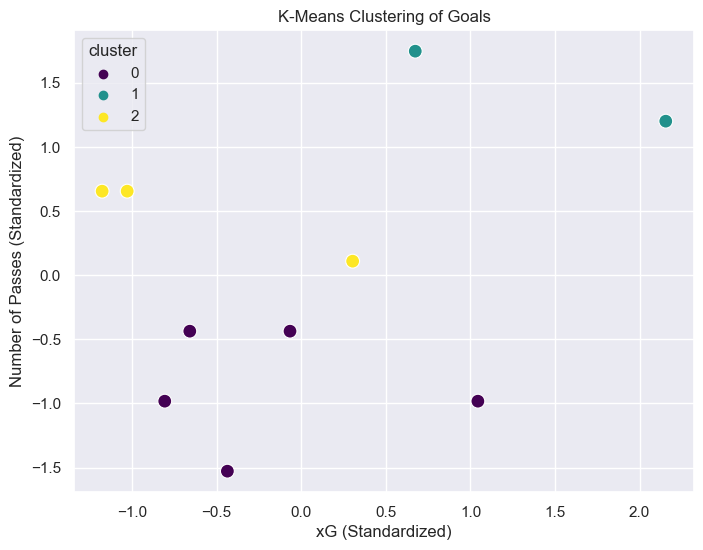

In [26]:
# Visualize clusters using a scatter plot (xG vs. num_passes)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='xG', y='num_passes', hue='cluster', data=df_encoded, palette='viridis', s=100)

plt.title('K-Means Clustering of Goals')
plt.xlabel('xG (Standardized)')
plt.ylabel('Number of Passes (Standardized)')
plt.show()
